# Engenharia de Atributos - E-commerce Dataset - Descrição do Problema

**Uma empresa internacional de comércio eletrônico(E-commerce)que vende produtos eletrônicos deseja descobrir informações importantes de seu banco de dados de clientes.** 

**Os produtos ficam armazenados em um armazém na sede da empresa. Após concluir a compra no web site da empresa, o cliente recebe o produto em casa, em qualquer parte do mundo.**  

**Os  produtos  são  enviados  de  Navio,  Avião  ou  Caminhão,  dependendo  da  região  de entrega.** 

**Em cada compra o cliente pode receber um desconto dependendo do peso do produto comprado.** 

**Cada cliente pode fazer chamadas ao suporte da empresa no caso de dúvidas ou problemas e após receber o produto o cliente pode deixar uma avaliação sobre a experiência de compra.** 

**O único dado pessoal sobre o cliente que está disponível é o gênero.**

**Fonte dos dados: Serão utilizados dados fictícios que representam dados reais de uma empresa de E-Commerce.**

# Imports e Ignorando Warnings

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import scipy
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

# Descrição das Colunas do Dataset

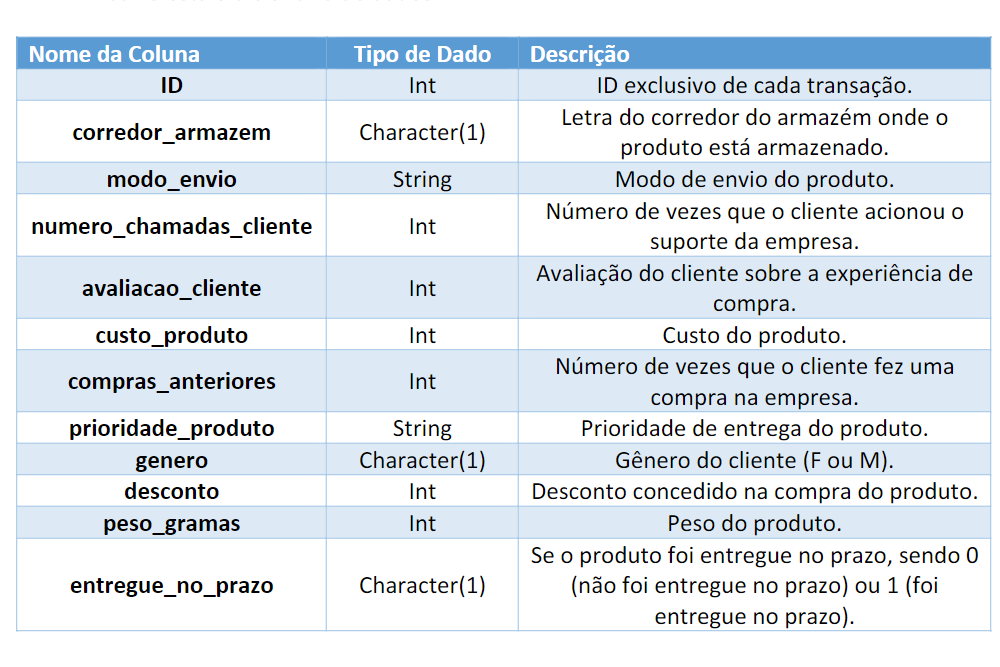

In [78]:
Image("colunas dataset.png")

# Carregando o Dataset

In [2]:
df = pd.read_csv("dados/dataset.csv")

In [3]:
df.head()

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1
3,4,B,Aviao,3,3,176,4,media,M,10,1177,1
4,5,C,Aviao,2,2,184,3,media,F,46,2484,1


In [4]:
df.shape

(11000, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       11000 non-null  int64 
 1   corredor_armazem         11000 non-null  object
 2   modo_envio               11000 non-null  object
 3   numero_chamadas_cliente  11000 non-null  int64 
 4   avaliacao_cliente        11000 non-null  int64 
 5   custo_produto            11000 non-null  int64 
 6   compras_anteriores       11000 non-null  int64 
 7   prioridade_produto       11000 non-null  object
 8   genero                   11000 non-null  object
 9   desconto                 11000 non-null  int64 
 10  peso_gramas              11000 non-null  int64 
 11  entregue_no_prazo        11000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [6]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [7]:
nums = ['numero_chamadas_cliente','avaliacao_cliente', 'custo_produto', 'compras_anteriores','desconto', 'peso_gramas']

In [8]:
cats = ['corredor_armazem', 'modo_envio','prioridade_produto', 'genero']

In [9]:
target = ['entregue_no_prazo']

In [10]:
df[nums].describe()

,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,4.054455,2.990455,210.200909,3.567727,13.372545,3633.844455
std,1.141438,1.413570,48.062985,1.522852,16.204943,1635.402722
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000


In [11]:
df[cats].describe()

,corredor_armazem,modo_envio,prioridade_produto,genero
count,11000,11000,11000,11000
unique,5,3,3,2
top,F,Navio,baixa,F
freq,3666,7463,5298,5546


In [12]:
df[target].value_counts()

entregue_no_prazo
1                    6563
0                    4437
dtype: int64

# Limpeza do Dataset

## Tratamento de valores nulos ou faltantes

In [13]:
df.isnull().sum()

ID                         0
corredor_armazem           0
modo_envio                 0
numero_chamadas_cliente    0
avaliacao_cliente          0
custo_produto              0
compras_anteriores         0
prioridade_produto         0
genero                     0
desconto                   0
peso_gramas                0
entregue_no_prazo          0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       11000 non-null  int64 
 1   corredor_armazem         11000 non-null  object
 2   modo_envio               11000 non-null  object
 3   numero_chamadas_cliente  11000 non-null  int64 
 4   avaliacao_cliente        11000 non-null  int64 
 5   custo_produto            11000 non-null  int64 
 6   compras_anteriores       11000 non-null  int64 
 7   prioridade_produto       11000 non-null  object
 8   genero                   11000 non-null  object
 9   desconto                 11000 non-null  int64 
 10  peso_gramas              11000 non-null  int64 
 11  entregue_no_prazo        11000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


**Não há valores nulos ou faltantes**

## Tratamento de valores duplicados

In [15]:
df.duplicated().sum()

0

**Não há valores duplicados**

## Tratamento de Outliers

**z-score será usado para identificar outliers**

In [16]:
registros = np.array([True] * len(df))

for col in nums:
    zscore = abs(stats.zscore(df[col]))
    registros = (zscore < 3) & registros

In [17]:
registros.value_counts()

True     10643
False      357
dtype: int64

In [18]:
df = df[registros]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10643 entries, 0 to 10999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       10643 non-null  int64 
 1   corredor_armazem         10643 non-null  object
 2   modo_envio               10643 non-null  object
 3   numero_chamadas_cliente  10643 non-null  int64 
 4   avaliacao_cliente        10643 non-null  int64 
 5   custo_produto            10643 non-null  int64 
 6   compras_anteriores       10643 non-null  int64 
 7   prioridade_produto       10643 non-null  object
 8   genero                   10643 non-null  object
 9   desconto                 10643 non-null  int64 
 10  peso_gramas              10643 non-null  int64 
 11  entregue_no_prazo        10643 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.1+ MB


# Engenharia de Atributos

## Seleção de Atributos

### Variáveis Numéricas

In [20]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [21]:
df.corr()

,ID,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas,entregue_no_prazo
ID,1.000000,0.190104,-0.008010,0.197842,0.184451,-0.591557,0.263811,-0.403501
numero_chamadas_cliente,0.190104,1.000000,0.013398,0.328148,0.246604,-0.132172,-0.285186,-0.066327
avaliacao_cliente,-0.008010,0.013398,1.000000,0.006332,0.004893,0.000551,-0.004440,0.014809
custo_produto,0.197842,0.328148,0.006332,1.000000,0.163395,-0.137703,-0.146885,-0.071954
compras_anteriores,0.184451,0.246604,0.004893,0.163395,1.000000,-0.106093,-0.235066,-0.062599
desconto,-0.591557,-0.132172,0.000551,-0.137703,-0.106093,1.000000,-0.365062,0.388192
peso_gramas,0.263811,-0.285186,-0.004440,-0.146885,-0.235066,-0.365062,1.000000,-0.258815
entregue_no_prazo,-0.403501,-0.066327,0.014809,-0.071954,-0.062599,0.388192,-0.258815,1.000000


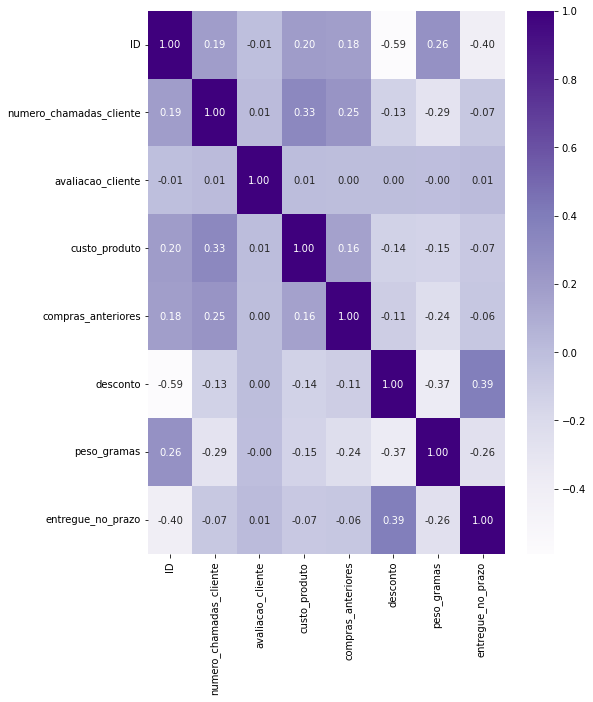

In [22]:
plt.figure(figsize = (8,10))
sns.heatmap(df.corr(), cmap = "Purples", annot = True, fmt = '.2f');

**Decisão:** Neste caso, as variáveis cuja correlação ultrapassam +/-0,1 em relação à variável alvo (`entregue_no_prazo`) serão selecionadas para serem processadas na Engenharia de Atributos, nesse caso: `desconto` e `peso_gramas`.

A variável `ID` será descartada, pois não representa informação útil.

### Variáveis Categóricas

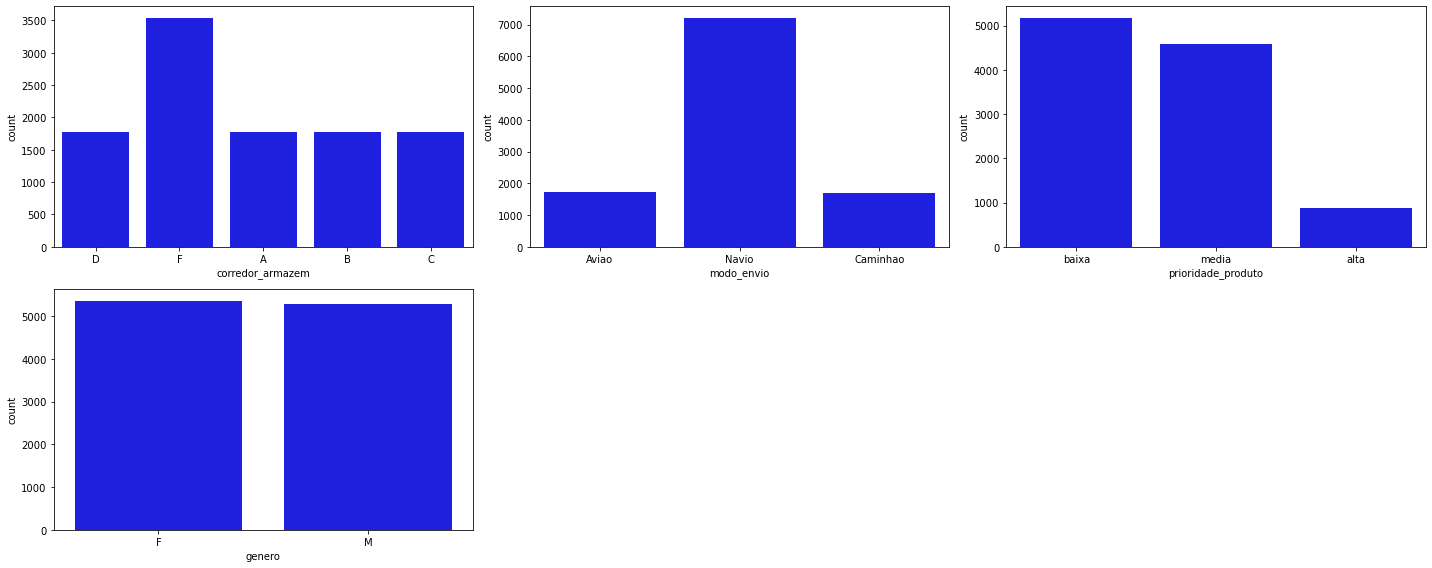

In [23]:
plt.figure(figsize = (20,8))
for i in range(len(cats)):
    plt.subplot(2,3,i+1)
    sns.countplot(x = df[cats[i]], color = 'blue', orient = 'v')
    plt.tight_layout()

**Decisão**: Observa-se que as variáveis possuem grandes diferenças nas contagens das classes, exceto a variável `genero`. Sendo assim, a variável `genero` não será selecionada para a Engenharia de Atributos

## Extração de Atributos

In [24]:
df_eng = df.copy()

In [25]:
df_eng.sample(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
3517,3518,F,Navio,4,5,254,3,baixa,M,1,4377,1
879,880,B,Navio,5,2,244,3,baixa,M,8,3571,1
4588,4589,C,Navio,3,4,166,3,media,F,8,4369,1
4993,4994,F,Navio,3,5,268,3,baixa,F,6,5603,0
2234,2235,A,Navio,4,5,168,3,baixa,F,4,1363,1


### 1) Performance de Prioridade de Envio por Prioridade do Produto

Todo atraso no envio dos produtos é igual? Ou seja, tem a mesma proporção? A prioridade de envio dos produtos gera mais ou menos atrasos?

Para analisar a performance de cada prioridade de envio, criaremos uma nova variável e utilizaremos os seguintes critérios de negócio:

- **Atraso Crítico**: Em caso de produto com prioridade **Alta** & com **atraso**

- **Atraso Problemático**: Em caso de produto com prioridade **Média** & com **atraso**

- **Atraso Tolerável**: Em caso de produto com prioridade **Baixa** e com **atraso**

- **Não Houve Atraso**: Em caso de produto entregue no prazo

In [26]:
df_eng['prioridade_produto'].value_counts()

baixa    5174
media    4587
alta      882
Name: prioridade_produto, dtype: int64

In [27]:
df_eng['performance_prioridade_envio'] = np.nan

In [28]:
df_eng['performance_prioridade_envio'] = np.where(
        (df_eng['prioridade_produto'] == 'alta') & (df_eng['entregue_no_prazo'] == 0),'Atraso Crítico',
    np.where(
        (df_eng['prioridade_produto'] == 'media') & (df_eng['entregue_no_prazo'] == 0),'Atraso Problemático',
    np.where(
        (df_eng['prioridade_produto'] == 'baixa') & (df_eng['entregue_no_prazo'] == 0),'Atraso Tolerável', 'Não Houve Atraso')))

In [29]:
df_eng['performance_prioridade_envio'].value_counts()

Não Houve Atraso       6282
Atraso Tolerável       2134
Atraso Problemático    1917
Atraso Crítico          310
Name: performance_prioridade_envio, dtype: int64

In [30]:
#Criando um df para reportar as informações
df_report1 = df_eng.groupby(['performance_prioridade_envio', 'entregue_no_prazo']).agg({'prioridade_produto': ['count']}).reset_index()
df_report1

,performance_prioridade_envio,entregue_no_prazo,prioridade_produto
,,,count
0,Atraso Crítico,0,310
1,Atraso Problemático,0,1917
2,Atraso Tolerável,0,2134
3,Não Houve Atraso,1,6282


In [31]:
df_report1.columns = ['performance_prioridade_envio', 'entregue_no_prazo', 'contagem']

In [32]:
#Pivot
df_report1 = pd.pivot_table(df_report1,
                           index = 'performance_prioridade_envio',
                           columns = 'entregue_no_prazo',
                           values = 'contagem').reset_index()
df_report1.head()

entregue_no_prazo,performance_prioridade_envio,0,1
0,Atraso Crítico,310.0,NaN
1,Atraso Problemático,1917.0,NaN
2,Atraso Tolerável,2134.0,NaN
3,Não Houve Atraso,NaN,6282.0


In [33]:
df_report1.columns = ['Status do Envio', 'Total Atraso', 'Total no Prazo']
df_report1.head()

,Status do Envio,Total Atraso,Total no Prazo
0,Atraso Crítico,310.0,NaN
1,Atraso Problemático,1917.0,NaN
2,Atraso Tolerável,2134.0,NaN
3,Não Houve Atraso,NaN,6282.0


In [34]:
df_report1 = df_report1.replace(np.nan, 0)
df_report1.head()

,Status do Envio,Total Atraso,Total no Prazo
0,Atraso Crítico,310.0,0.0
1,Atraso Problemático,1917.0,0.0
2,Atraso Tolerável,2134.0,0.0
3,Não Houve Atraso,0.0,6282.0


In [35]:
df_report1['Total'] = df_report1['Total Atraso'] + df_report1['Total no Prazo']

In [36]:
df_report1.drop(df_report1.columns[[1,2]], axis = 1, inplace = True)
df_report1.head()

,Status do Envio,Total
0,Atraso Crítico,310.0
1,Atraso Problemático,1917.0
2,Atraso Tolerável,2134.0
3,Não Houve Atraso,6282.0


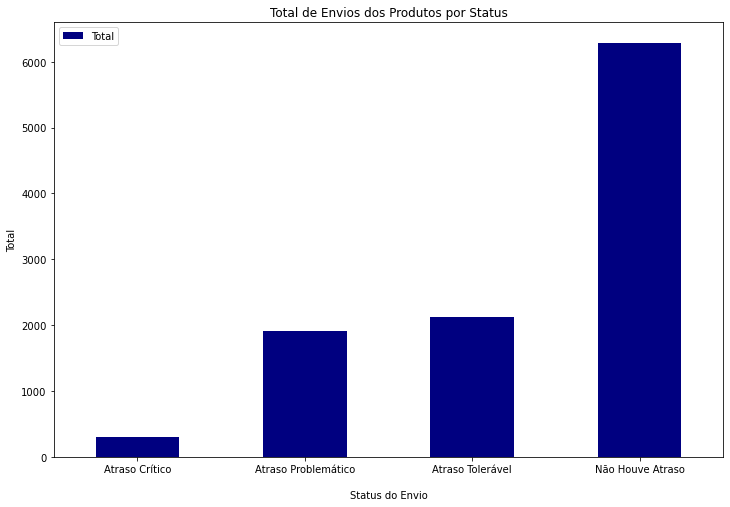

In [37]:
df_report1.set_index('Status do Envio').plot(kind = 'bar',
                                            title = 'Total de Envios dos Produtos por Status',
                                            ylabel = 'Total',
                                            xlabel = '\nStatus do Envio',
                                            colormap = 'jet',
                                            figsize = (12,8))
plt.xticks(rotation = 0)
plt.show()

**Observa-se que HÁ diferenças na proporção de atraso entre cada tipo de prioridade, o que será útil na fase de machine learning**



### 2) Performance de Envio do Produto Por Prioridade de Envio e Modo de Envio

O modo de envio dos produtos associado à prioridade de envio dos produtos, tem impacto no atraso dos produtos?

Criaremos uma nova variável que representa a performance do envio do produto com base na seguinte regra de negócio:

- Se a prioridade do produto era alta, o modo de envio era Navio e houve atraso no envio, o atraso é **crítico por Navio**.
- Se a prioridade do produto era média, o modo de envio era Navio e houve atraso no envio, o atraso é **problemático por Navio**.
- Se a prioridade do produto era baixa, o modo de envio era Navio e houve atraso no envio, o atraso é **tolerável por Navio**.
- Se a prioridade do produto era alta, o modo de envio era Aviao e houve atraso no envio, o atraso é **crítico por Aviao**.
- Se a prioridade do produto era média, o modo de envio era Aviao e houve atraso no envio, o atraso é **problemático por Aviao**.
- Se a prioridade do produto era baixa, o modo de envio era Aviao e houve atraso no envio, o atraso é **tolerável por Aviao**.
- Se a prioridade do produto era alta, o modo de envio era Caminhao e houve atraso no envio, o atraso é **crítico por Caminhao**.
- Se a prioridade do produto era média, o modo de envio era Caminhao e houve atraso no envio, o atraso é **problemático por Caminhao**.
- Se a prioridade do produto era baixa, o modo de envio era Caminhao e houve atraso no envio, o atraso é **tolerável por Caminhao**.
- Outra opção significa que o envio foi feito no prazo e **Não Houve Atraso**

In [38]:
df_eng.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo', 'performance_prioridade_envio'],
      dtype='object')

In [39]:
df_eng['modo_envio'].value_counts()

Navio       7212
Aviao       1728
Caminhao    1703
Name: modo_envio, dtype: int64

In [40]:
df_eng['performance_modo_envio'] = np.where(
        (df_eng['prioridade_produto'] == 'alta') & (df_eng['modo_envio'] == 'Navio') & (df_eng['entregue_no_prazo'] == 0), "Atraso Crítico na Entrega Por Navio", 
    np.where(
        (df_eng['prioridade_produto'] == 'media') & (df_eng['modo_envio'] == 'Navio') & (df_eng['entregue_no_prazo'] == 0), "Atraso Problemático na Entrega Por Navio",
    np.where(
        (df_eng['prioridade_produto'] == 'baixa') & (df_eng['modo_envio'] == 'Navio') & (df_eng['entregue_no_prazo'] == 0), "Atraso Tolerável na Entrega Por Navio", 
    np.where(
        (df_eng['prioridade_produto'] == 'alta') & (df_eng['modo_envio'] == 'Aviao') & (df_eng['entregue_no_prazo'] == 0), "Atraso Crítico na Entrega Por Aviao", 
    np.where(
        (df_eng['prioridade_produto'] == 'media') & (df_eng['modo_envio'] == 'Aviao') & (df_eng['entregue_no_prazo'] == 0), "Atraso Problemático na Entrega Por Aviao",
    np.where(
        (df_eng['prioridade_produto'] == 'baixa') & (df_eng['modo_envio'] == 'Aviao') & (df_eng['entregue_no_prazo'] == 0), "Atraso Tolerável na Entrega Por Aviao", 
    np.where(
        (df_eng['prioridade_produto'] == 'alta') & (df_eng['modo_envio'] == 'Caminhao') & (df_eng['entregue_no_prazo'] == 0), "Atraso Crítico na Entrega Por Caminhao", 
    np.where(
        (df_eng['prioridade_produto'] == 'media') & (df_eng['modo_envio'] == 'Caminhao') & (df_eng['entregue_no_prazo'] == 0), "Atraso Problemático na Entrega Por Caminhao",
    np.where(
        (df_eng['prioridade_produto'] == 'baixa') & (df_eng['modo_envio'] == 'Caminhao') & (df_eng['entregue_no_prazo'] == 0), "Atraso Tolerável na Entrega Por Caminhao", 
    "Não Houve Atraso")))))))))

In [41]:
df_eng.sample(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,performance_prioridade_envio,performance_modo_envio
10456,10457,C,Navio,5,4,217,6,media,M,6,1483,1,Não Houve Atraso,Não Houve Atraso
5164,5165,C,Navio,4,2,166,3,media,F,8,4758,0,Atraso Problemático,Atraso Problemático na Entrega Por Navio
10639,10640,F,Navio,3,3,176,8,media,F,1,4895,1,Não Houve Atraso,Não Houve Atraso
4888,4889,C,Navio,6,5,206,6,baixa,M,2,4014,1,Não Houve Atraso,Não Houve Atraso
4447,4448,F,Navio,6,1,237,5,alta,M,2,5364,0,Atraso Crítico,Atraso Crítico na Entrega Por Navio


In [42]:
df_eng['performance_modo_envio'].value_counts()

Não Houve Atraso                               6282
Atraso Tolerável na Entrega Por Navio          1453
Atraso Problemático na Entrega Por Navio       1307
Atraso Tolerável na Entrega Por Caminhao        350
Atraso Tolerável na Entrega Por Aviao           331
Atraso Problemático na Entrega Por Caminhao     310
Atraso Problemático na Entrega Por Aviao        300
Atraso Crítico na Entrega Por Navio             194
Atraso Crítico na Entrega Por Aviao              65
Atraso Crítico na Entrega Por Caminhao           51
Name: performance_modo_envio, dtype: int64

In [43]:
df_report2 = df_eng.groupby(['performance_modo_envio', 'entregue_no_prazo']).agg({'prioridade_produto':['count']}).reset_index()
df_report2

,performance_modo_envio,entregue_no_prazo,prioridade_produto
,,,count
0,Atraso Crítico na Entrega Por Aviao,0,65
1,Atraso Crítico na Entrega Por Caminhao,0,51
2,Atraso Crítico na Entrega Por Navio,0,194
3,Atraso Problemático na Entrega Por Aviao,0,300
4,Atraso Problemático na Entrega Por Caminhao,0,310
5,Atraso Problemático na Entrega Por Navio,0,1307
6,Atraso Tolerável na Entrega Por Aviao,0,331
7,Atraso Tolerável na Entrega Por Caminhao,0,350
8,Atraso Tolerável na Entrega Por Navio,0,1453


In [44]:
df_report2.columns = ['performance_modo_envio','entregue_no_prazo','contagem']

In [45]:
#Pivot
df_report2 = pd.pivot_table(df_report2,
                           index = 'performance_modo_envio',
                           columns = 'entregue_no_prazo',
                           values = 'contagem').reset_index()

df_report2.sample(10)

entregue_no_prazo,performance_modo_envio,0,1
0,Atraso Crítico na Entrega Por Aviao,65.0,NaN
4,Atraso Problemático na Entrega Por Caminhao,310.0,NaN
9,Não Houve Atraso,NaN,6282.0
5,Atraso Problemático na Entrega Por Navio,1307.0,NaN
7,Atraso Tolerável na Entrega Por Caminhao,350.0,NaN
2,Atraso Crítico na Entrega Por Navio,194.0,NaN
3,Atraso Problemático na Entrega Por Aviao,300.0,NaN
8,Atraso Tolerável na Entrega Por Navio,1453.0,NaN
1,Atraso Crítico na Entrega Por Caminhao,51.0,NaN
6,Atraso Tolerável na Entrega Por Aviao,331.0,NaN


In [46]:
df_report2.columns = ['Status do Envio', 'Total Atraso','Total no Prazo']

In [47]:
df_report2.replace(np.nan,0, inplace = True)

In [48]:
df_report2['Total'] = df_report2['Total Atraso'] + df_report2['Total no Prazo']

In [49]:
df_report2.drop(df_report2.columns[[1,2]], axis = 1, inplace = True)
df_report2.sample(10)

,Status do Envio,Total
4,Atraso Problemático na Entrega Por Caminhao,310.0
3,Atraso Problemático na Entrega Por Aviao,300.0
8,Atraso Tolerável na Entrega Por Navio,1453.0
0,Atraso Crítico na Entrega Por Aviao,65.0
1,Atraso Crítico na Entrega Por Caminhao,51.0
5,Atraso Problemático na Entrega Por Navio,1307.0
2,Atraso Crítico na Entrega Por Navio,194.0
9,Não Houve Atraso,6282.0
6,Atraso Tolerável na Entrega Por Aviao,331.0
7,Atraso Tolerável na Entrega Por Caminhao,350.0


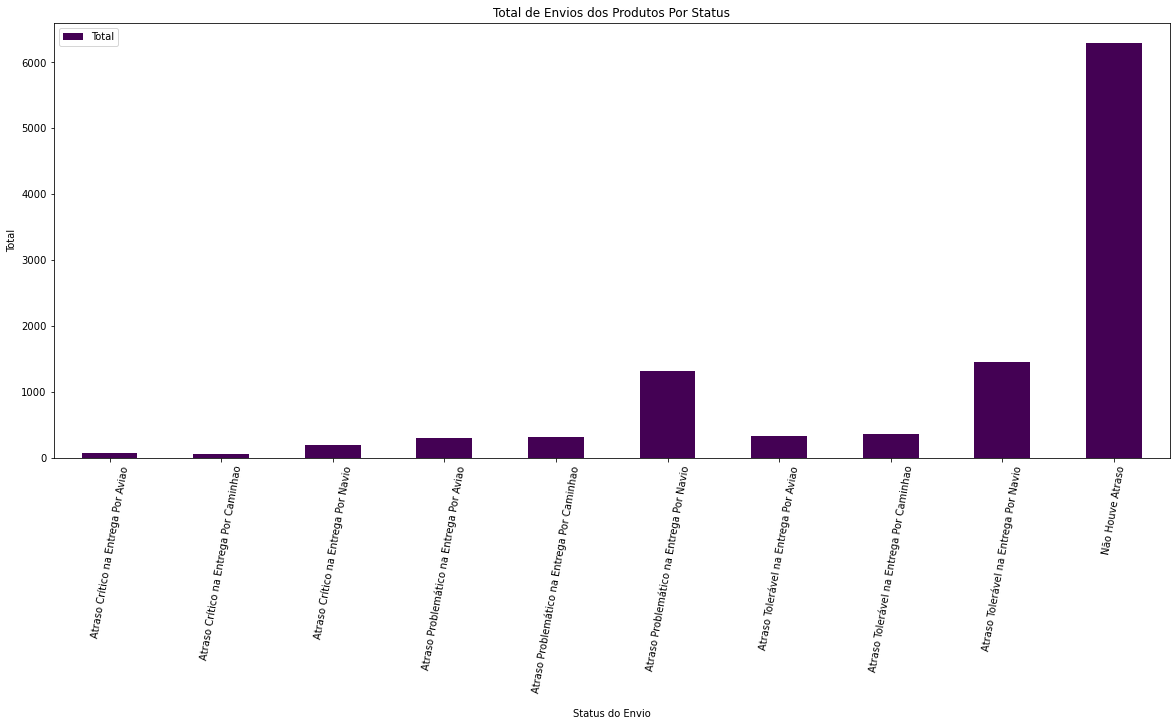

In [50]:
#Plot
df_report2.set_index('Status do Envio').plot(kind = 'bar',
                                            title = 'Total de Envios dos Produtos Por Status',
                                            ylabel = 'Total',
                                            xlabel = '\nStatus do Envio',
                                            colormap = 'viridis',
                                            figsize = (20,8))
plt.xticks(rotation = 80)
plt.show()

**Observa-se que os envios por NAVIO são so que mais apresentam atraso**

**Neste caso, recomenda-se reavaliar esta forma de envio a fim de melhorá-la**

### 3) Performance de Envio dos Produtos Considerando os Descontos

Há diferença na performance de envio dos produtos quando o produto recebe algum tipo de desconto?

Criaremos duas novas variáveis com base na seguinte regra de negócios:

**Variável 1 - faixa_desconto**

- Desconto acima ou igual à média
- Desconto abaixo da média

**Variável 2 - performance_faixa_desconto**

- Se a faixa de desconto foi acima ou igual à média e houve atraso na entrega = "Atraso na Entrega com Desconto Acima da Média"

- Se a faixa de desconto foi acima ou igual à e não houve atraso na entrega = "Entrega no Prazo com Desconto Acima da Média"

- Se a faixa de desconto foi abaixo da média e houve atraso na entrega = "Atraso na Entrega com Desconto Abaixo da Média"

- Se a faixa de desconto foi abaixo da média e não houve atraso na entrega = "Entrega no Prazo com Desconto Abaixo da Média"

In [51]:
df_eng.describe()

,ID,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas,entregue_no_prazo
count,10643.000000,10643.000000,10643.000000,10643.000000,10643.000000,10643.000000,10643.000000,10643.000000
mean,5570.857935,4.065677,2.989101,210.582730,3.463591,12.528047,3646.334962,0.590247
std,3160.095859,1.145294,1.412310,48.077488,1.288881,14.991968,1639.876242,0.491811
min,1.000000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2881.500000,3.000000,2.000000,170.000000,3.000000,4.000000,1837.000000,0.000000
50%,5605.000000,4.000000,3.000000,215.000000,3.000000,7.000000,4172.000000,1.000000
75%,8301.500000,5.000000,4.000000,251.000000,4.000000,10.000000,5063.500000,1.000000
max,11000.000000,7.000000,5.000000,310.000000,8.000000,61.000000,7846.000000,1.000000


In [52]:
df_eng['faixa_desconto'] = np.where(df_eng['desconto'] < df_eng['desconto'].mean(), 'desconto abaixo da média', 'desconto acima da média')

In [53]:
df_eng.sample(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,performance_prioridade_envio,performance_modo_envio,faixa_desconto
1480,1481,C,Caminhao,4,1,226,3,baixa,F,28,2211,1,Não Houve Atraso,Não Houve Atraso,desconto acima da média
7505,7506,F,Navio,7,3,305,4,baixa,F,3,1872,0,Atraso Tolerável,Atraso Tolerável na Entrega Por Navio,desconto abaixo da média
7792,7793,C,Caminhao,3,1,194,3,media,F,4,5383,1,Não Houve Atraso,Não Houve Atraso,desconto abaixo da média
7057,7058,F,Navio,4,5,246,2,media,F,3,5705,0,Atraso Problemático,Atraso Problemático na Entrega Por Navio,desconto abaixo da média
4955,4956,F,Navio,2,2,177,4,baixa,M,8,5878,1,Não Houve Atraso,Não Houve Atraso,desconto abaixo da média


In [54]:
df_eng['performance_faixa_desconto'] = np.where(
        (df_eng['faixa_desconto'] == 'desconto acima da média') & (df_eng['entregue_no_prazo'] == 0), 'Atraso na Entrega com Desconto Acima da Média',
    np.where(
        (df_eng['faixa_desconto'] == 'desconto acima da média') & (df_eng['entregue_no_prazo'] == 1), 'Entrega no Prazo com Desconto Acima da Média',
    np.where(
        (df_eng['faixa_desconto'] == 'desconto abaixo da média') & (df_eng['entregue_no_prazo'] == 0), 'Atraso na Entrega com Desconto Abaixo da Média','Entrega no Prazo com Desconto Abaixo da Média')))

In [55]:
df_eng['performance_faixa_desconto'].value_counts()

Atraso na Entrega com Desconto Abaixo da Média    4361
Entrega no Prazo com Desconto Abaixo da Média     3978
Entrega no Prazo com Desconto Acima da Média      2304
Name: performance_faixa_desconto, dtype: int64

**Observa-se que não há entregas com Atraso com desconto acima da média**

In [56]:
#criando um dataframe para o report dos insights
df_report3 = df_eng.groupby('performance_faixa_desconto').agg({'faixa_desconto': ['count']}).reset_index()
df_report3

,performance_faixa_desconto,faixa_desconto
,,count
0,Atraso na Entrega com Desconto Abaixo da Média,4361
1,Entrega no Prazo com Desconto Abaixo da Média,3978
2,Entrega no Prazo com Desconto Acima da Média,2304


In [57]:
df_report3.columns = ['Performance por Faixa de Desconto','Total']

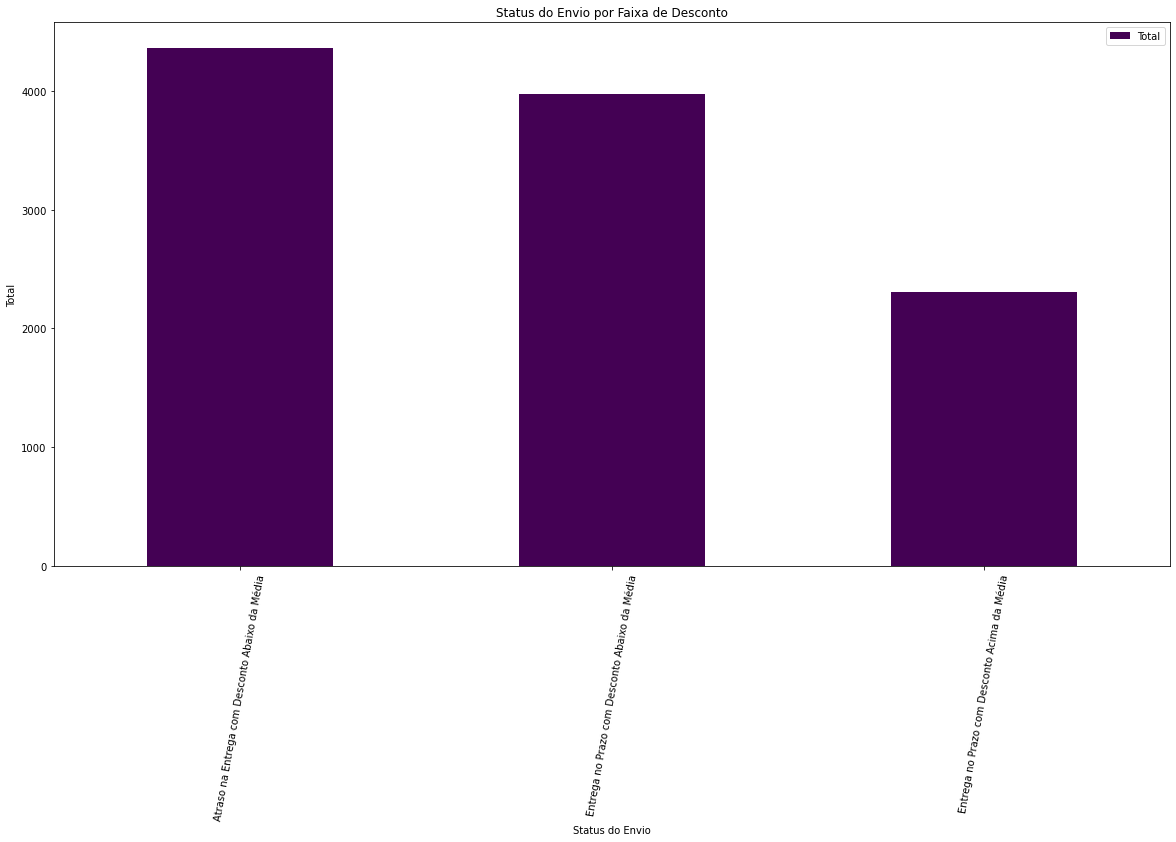

In [58]:
df_report3.set_index('Performance por Faixa de Desconto').plot(kind = 'bar',
                                        title = 'Status do Envio por Faixa de Desconto',
                                        xlabel = 'Status do Envio',
                                        ylabel = 'Total',
                                        colormap = 'viridis',
                                        figsize = (20,10))
plt.xticks(rotation = 80)
plt.show()

**Observa-se que produtos com desconto ABAIXO da média tem uma forte relação com atrasos na entrega**

**Já os produtos com desconto ACIMA da média não possuem entregas com atraso**

### 4) Performance de Envio do Produto Considerando Seu Peso 

Há diferença na performance de envio dos produtos quando o produto é mais pesado?

Criaremos uma nova variável com base na seguinte regra de negócios:

**Variável 1 - faixa_peso**

- Peso acima ou igual à média
- Peso abaixo da média

In [59]:
#Analisando a variável peso_gramas
df_eng.peso_gramas.describe().reset_index()

,index,peso_gramas
0,count,10643.000000
1,mean,3646.334962
2,std,1639.876242
3,min,1001.000000
4,25%,1837.000000
5,50%,4172.000000
6,75%,5063.500000
7,max,7846.000000


In [60]:
df_eng['faixa_peso'] = np.where(df_eng['peso_gramas'] < df_eng['peso_gramas'].mean(),'Abaixo da Média', 'Acima da Média')

In [61]:
df_eng['faixa_peso'].value_counts()

Acima da Média     6145
Abaixo da Média    4498
Name: faixa_peso, dtype: int64

In [62]:
df_report4 = df_eng.groupby(['faixa_peso', 'performance_prioridade_envio']).agg({'peso_gramas':'count'}).reset_index()
df_report4

,faixa_peso,performance_prioridade_envio,peso_gramas
0,Abaixo da Média,Atraso Crítico,17
1,Abaixo da Média,Atraso Problemático,412
2,Abaixo da Média,Atraso Tolerável,618
3,Abaixo da Média,Não Houve Atraso,3451
4,Acima da Média,Atraso Crítico,293
5,Acima da Média,Atraso Problemático,1505
6,Acima da Média,Atraso Tolerável,1516
7,Acima da Média,Não Houve Atraso,2831


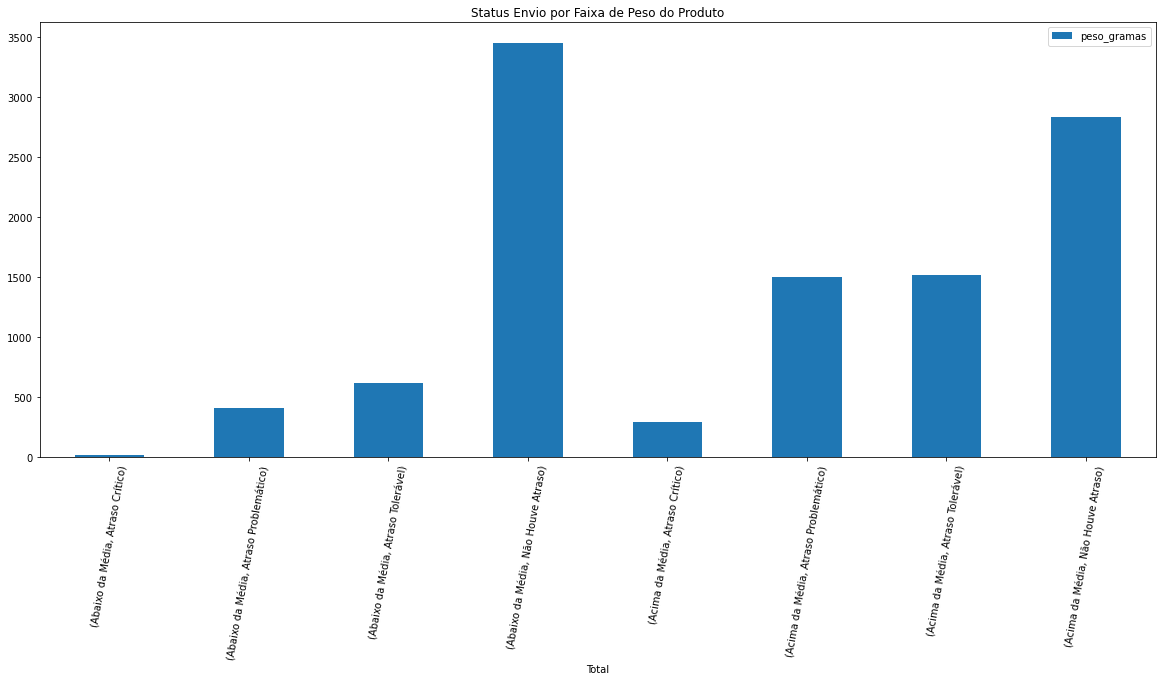

In [63]:
df_report4.set_index(['faixa_peso', 'performance_prioridade_envio']).plot(kind = 'bar',
                                          title = "Status Envio por Faixa de Peso do Produto",
                                          xlabel = 'Total',
                                          figsize = (20,8))
plt.xticks(rotation = 80)
plt.show()

**Observa-se que produtos com peso ACIMA da média (3,64 kg neste caso) tem uma tendência maior a atrasos**

In [64]:
df_report4_2 = df_eng.groupby(['faixa_peso','performance_prioridade_envio','modo_envio']).agg({'ID':'count'}).reset_index()
df_report4_2

,faixa_peso,performance_prioridade_envio,modo_envio,ID
0,Abaixo da Média,Atraso Crítico,Aviao,4
1,Abaixo da Média,Atraso Crítico,Caminhao,4
2,Abaixo da Média,Atraso Crítico,Navio,9
3,Abaixo da Média,Atraso Problemático,Aviao,68
4,Abaixo da Média,Atraso Problemático,Caminhao,75
5,Abaixo da Média,Atraso Problemático,Navio,269
6,Abaixo da Média,Atraso Tolerável,Aviao,102
7,Abaixo da Média,Atraso Tolerável,Caminhao,99
8,Abaixo da Média,Atraso Tolerável,Navio,417
9,Abaixo da Média,Não Houve Atraso,Aviao,557


In [65]:
df_report4_2.sort_values(by = ['modo_envio','faixa_peso'], inplace = True)
df_report4_2

,faixa_peso,performance_prioridade_envio,modo_envio,ID
0,Abaixo da Média,Atraso Crítico,Aviao,4
3,Abaixo da Média,Atraso Problemático,Aviao,68
6,Abaixo da Média,Atraso Tolerável,Aviao,102
9,Abaixo da Média,Não Houve Atraso,Aviao,557
12,Acima da Média,Atraso Crítico,Aviao,61
15,Acima da Média,Atraso Problemático,Aviao,232
18,Acima da Média,Atraso Tolerável,Aviao,229
21,Acima da Média,Não Houve Atraso,Aviao,475
1,Abaixo da Média,Atraso Crítico,Caminhao,4
4,Abaixo da Média,Atraso Problemático,Caminhao,75


In [66]:
df_report4_2.columns = ['Faixa de Peso', 'Status do Envio','Modo de Envio','Total']

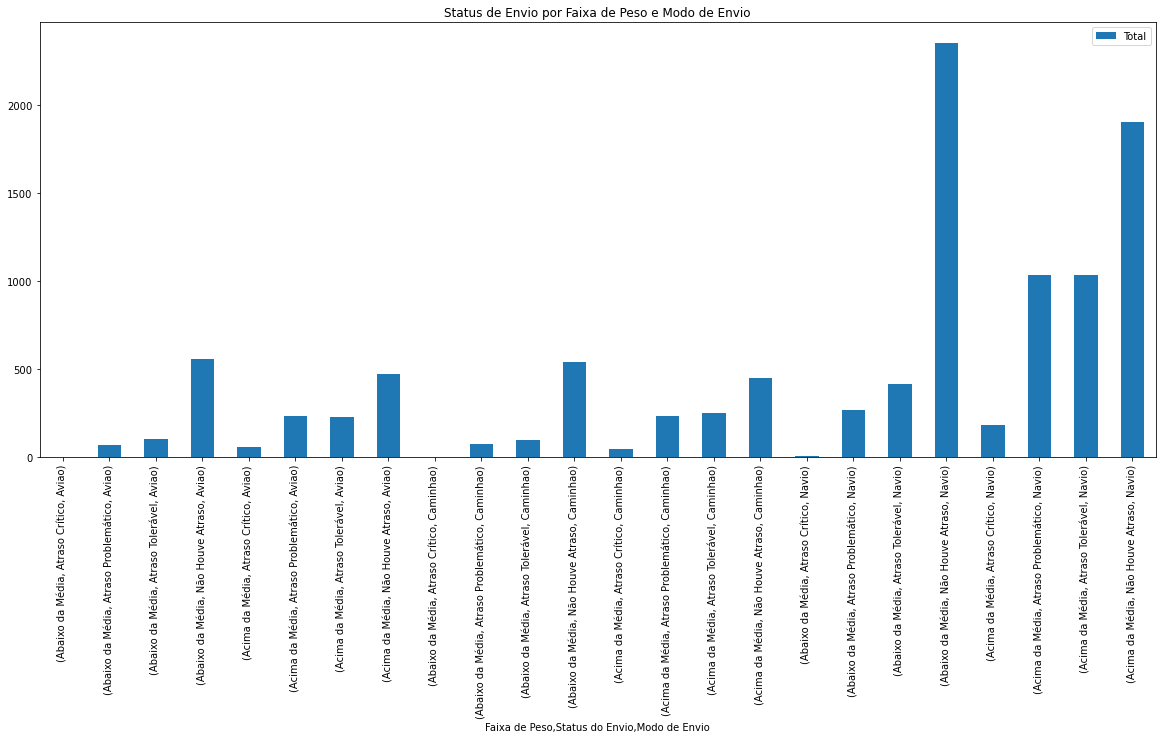

In [67]:
df_report4_2.set_index(['Faixa de Peso', 'Status do Envio','Modo de Envio']).plot(kind = 'bar',
                                                                                       title = 'Status de Envio por Faixa de Peso e Modo de Envio',
                                                                                       figsize = (20,8))
plt.show()

**Observa-se que o peso ACIMA da média aumenta as chances de atraso em todos os modos de envio**

### 5) Performance de Envio dos Produtos Por Corredor do Armazém

In [68]:
df_eng.corredor_armazem.value_counts()

F    3539
B    1778
D    1777
A    1777
C    1772
Name: corredor_armazem, dtype: int64

In [69]:
df_eng.head()

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,performance_prioridade_envio,performance_modo_envio,faixa_desconto,performance_faixa_desconto,faixa_peso
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1,Não Houve Atraso,Não Houve Atraso,desconto acima da média,Entrega no Prazo com Desconto Acima da Média,Abaixo da Média
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1,Não Houve Atraso,Não Houve Atraso,desconto acima da média,Entrega no Prazo com Desconto Acima da Média,Abaixo da Média
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1,Não Houve Atraso,Não Houve Atraso,desconto acima da média,Entrega no Prazo com Desconto Acima da Média,Abaixo da Média
3,4,B,Aviao,3,3,176,4,media,M,10,1177,1,Não Houve Atraso,Não Houve Atraso,desconto abaixo da média,Entrega no Prazo com Desconto Abaixo da Média,Abaixo da Média
4,5,C,Aviao,2,2,184,3,media,F,46,2484,1,Não Houve Atraso,Não Houve Atraso,desconto acima da média,Entrega no Prazo com Desconto Acima da Média,Abaixo da Média


In [70]:
df_report5 = df_eng.groupby(['corredor_armazem', 'performance_prioridade_envio']).agg({'ID':'count'}).reset_index()
df_report5

,corredor_armazem,performance_prioridade_envio,ID
0,A,Atraso Crítico,52
1,A,Atraso Problemático,326
2,A,Atraso Tolerável,370
3,A,Não Houve Atraso,1029
4,B,Atraso Crítico,40
5,B,Atraso Problemático,311
6,B,Atraso Tolerável,361
7,B,Não Houve Atraso,1066
8,C,Atraso Crítico,53
9,C,Atraso Problemático,337


In [71]:
df_report5.columns = ['Corredor do Armazém', 'Status do Envio','Total']

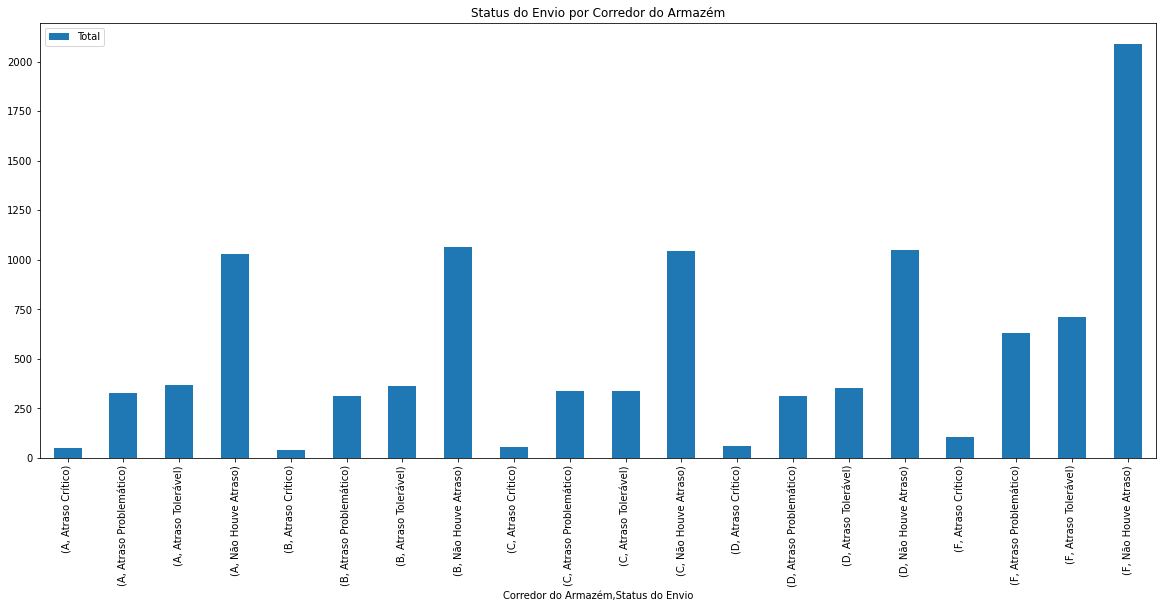

In [72]:
df_report5.set_index(['Corredor do Armazém', 'Status do Envio']).plot(kind = 'bar',
                                                                     title = 'Status do Envio por Corredor do Armazém',
                                                                     figsize = (20,8))
plt.show()

**Observa-se que:**

**O corredor `F` possui uma quantidade significativamente maior de produtos enviados, porém é o corredor com melhor performance de envio**

**Recomenda-se analisar a estrutura do armazém. (Ex: O corredor F está num local de fácil acesso?)**

## Salvando o Dataframe em arquivo .csv na máquina local

In [73]:
df_eng.to_csv('dados/df_eng.csv', sep = ',', encoding = 'utf-8')